# **CNN Model for MNIST dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from keras.models import Sequential
from keras.utils import np_utils
from sklearn.model_selection import train_test_split




#Loading data, test-train split

In [2]:
from keras.datasets import mnist

#creating variables
(X_train, y_train), (X_test,y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


#### For modified train-test split

In [20]:
# training_size = 0.65 #@param {type:"slider",min:0.5,max:0.9,step:0.05}

# X = np.concatenate((X_train,X_test))
# y = np.concatenate((y_train,y_test))

# X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = training_size,shuffle=True)

In [21]:
X_train.shape

(45500, 28, 28, 1)

In [22]:
X_test.shape

(24500, 28, 28, 1)

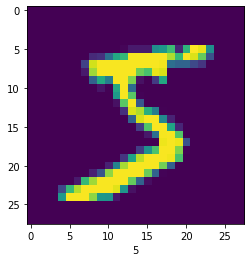

In [6]:
#function to view an image 

def show_data(index):
    plt.imshow(X_train[index])
    plt.xlabel(y_train[index])

show_data(0)


## pre-processing the image for model 

In [7]:
#input vector from 28x28 pixel
#one color channel
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#converting image matrix values to float in order to normalize 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#normalizing values between 0 and 1
X_train /= 255
X_test /= 255




In [8]:
#shape before categorical matrix transformation
y_train.shape

(60000,)

In [9]:
#last step of data-preprocessing...
#coverting the outputs to categorical matrix of size (samples,no_outputs)

number_of_output_classes = 10

Y_train = np_utils.to_categorical(y_train,number_of_output_classes)
Y_test = np_utils.to_categorical(y_test, number_of_output_classes)



# making the CNN model


In [10]:
model = Sequential()
# convolutional layer

model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))

# flatten output
model.add(Flatten())

# hidden layer
model.add(Dense(100, activation='relu'))

# output layer 
model.add(Dense(10, activation='softmax'))

# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')



In [11]:
batch_size = 100 #@param {type:"slider", min:80, max:300, step:20}
epochs = 8 #@param {type:"slider", min:3, max:12, step:1}

In [12]:
# training the model using GPU
my_model = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/8
600/600 [==============================] - 14s 8ms/step - loss: 0.2180 - accuracy: 0.9376 - val_loss: 0.0758 - val_accuracy: 0.9770
Epoch 2/8
600/600 [==============================] - 4s 6ms/step - loss: 0.0670 - accuracy: 0.9802 - val_loss: 0.0571 - val_accuracy: 0.9806
Epoch 3/8
600/600 [==============================] - 3s 4ms/step - loss: 0.0452 - accuracy: 0.9865 - val_loss: 0.0487 - val_accuracy: 0.9832
Epoch 4/8
600/600 [==============================] - 2s 4ms/step - loss: 0.0339 - accuracy: 0.9897 - val_loss: 0.0496 - val_accuracy: 0.9845
Epoch 5/8
600/600 [==============================] - 2s 4ms/step - loss: 0.0256 - accuracy: 0.9920 - val_loss: 0.0429 - val_accuracy: 0.9859
Epoch 6/8
600/600 [==============================] - 2s 4ms/step - loss: 0.0196 - accuracy: 0.9942 - val_loss: 0.0487 - val_accuracy: 0.9841
Epoch 7/8
600/600 [==============================] - 2s 4ms/step - loss: 0.0145 - accuracy: 0.9956 - val_loss: 0.0504 - val_accuracy: 0.9846
Epoch 8/8
60

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 25)        250       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 25)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4225)              0         
                                                                 
 dense (Dense)               (None, 100)               422600    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 423,860
Trainable params: 423,860
Non-trainable params: 0
__________________________________________________

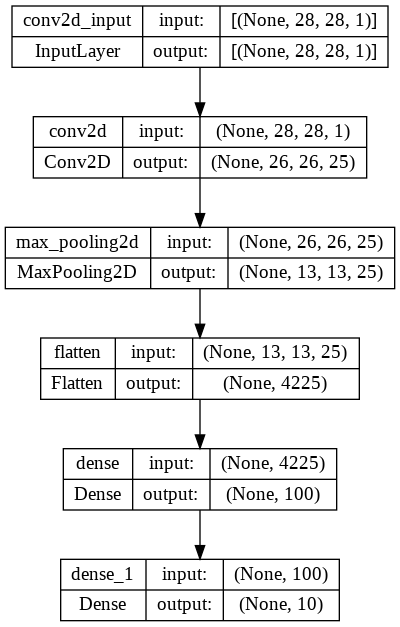

In [14]:
#viewing the model architecture
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='CNN_model_plot.png', show_shapes=True, show_layer_names=True)

# representating of the model's performance

Text(0.5, 1.0, 'Model performance epochs v/s accuracy')

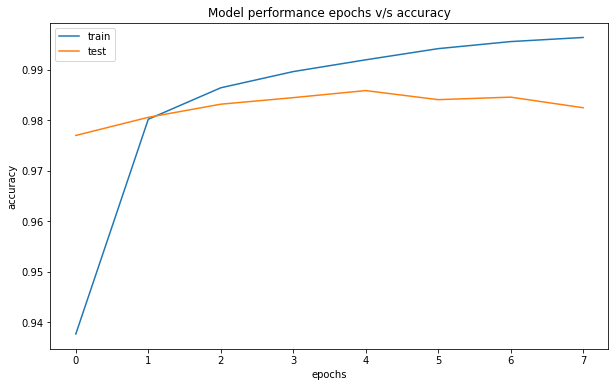

In [15]:
plt.figure(figsize=(10,6))
plt.plot(my_model.history['accuracy'])
plt.plot(my_model.history['val_accuracy'])
plt.legend(['train','test'])
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('Model performance epochs v/s accuracy')

Text(0.5, 1.0, 'Model performance epochs v/s loss')

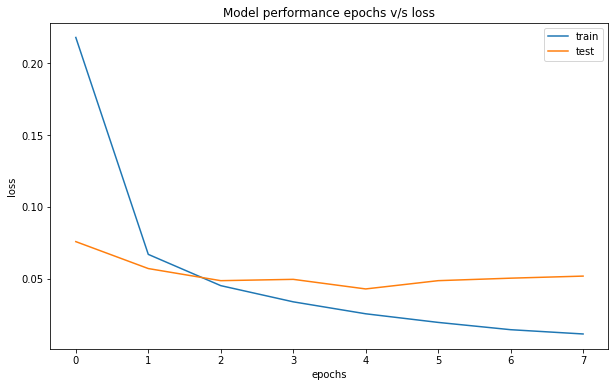

In [16]:
plt.figure(figsize=(10,6))
plt.plot(my_model.history['loss'])
plt.plot(my_model.history['val_loss'])
plt.legend(['train','test'])
plt.ylabel('loss')
plt.xlabel('epochs')
plt.title('Model performance epochs v/s loss')